# Fraud detection

In [1]:
#load packages
import sys
import pandas as pd
import matplotlib 
import numpy as np 
import scipy as sp 
import sklearn 
#misc libraries
import random
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection as ms
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.random_projection import GaussianRandomProjection
from xverse.ensemble import VotingSelector
from xverse.feature_subset import SplitXY
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
%config InlineBackend.figure_format='retina'

In [80]:
df = pd.read_csv('creditcard.csv')
df.info()
df.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [81]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [82]:
df.drop(['Time'], axis=1, inplace=True)

## Visualization

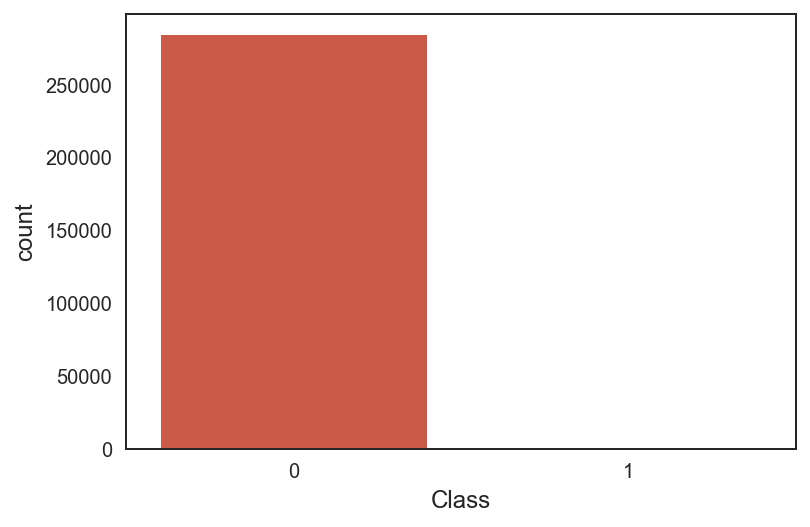

In [6]:
sns.countplot(x='Class', data=df);

In [7]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
print("Non-Fraudulent : ",classes[0]," ",normal_share,"%")
print("    Fraudulent : ",classes[1]," ",fraud_share,"%")


Non-Fraudulent :  284315   99.83 %
    Fraudulent :  492   0.17 %


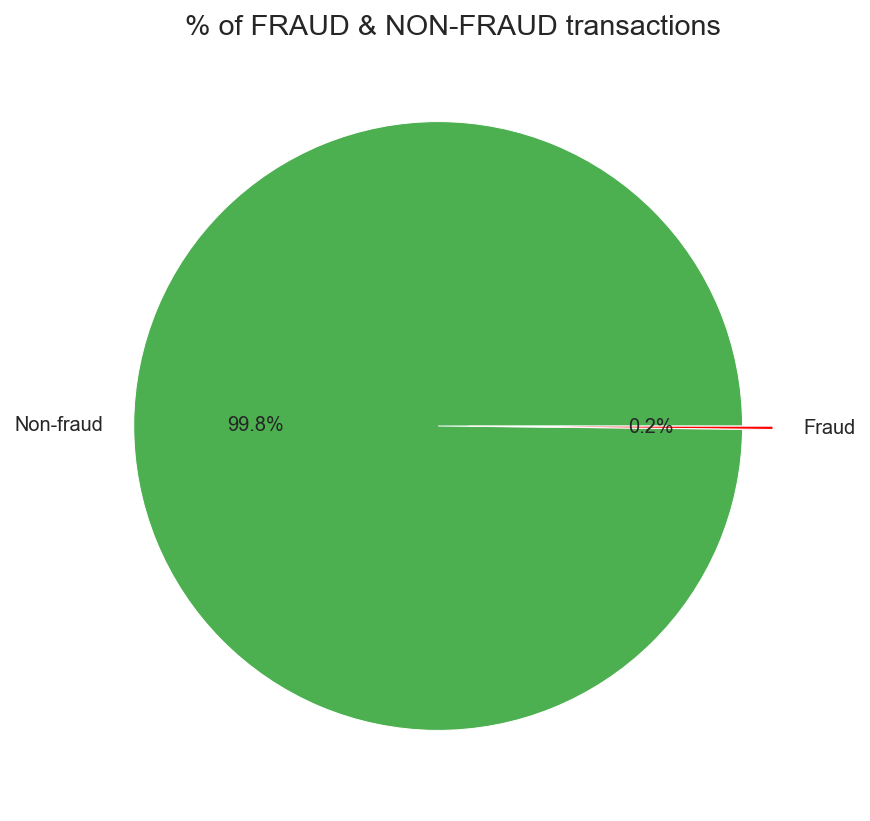

In [8]:
pie, ax = plt.subplots(figsize=[7,7])
labels = ['Non-fraud', 'Fraud']
colors = ['Salmon', 'Chartreuse']
plt.pie(x = classes, autopct='%.1f%%', explode=[0.05]*2,colors=['#4CAF50','r'] ,labels=labels)
plt.title('% of FRAUD & NON-FRAUD transactions')
plt.show()

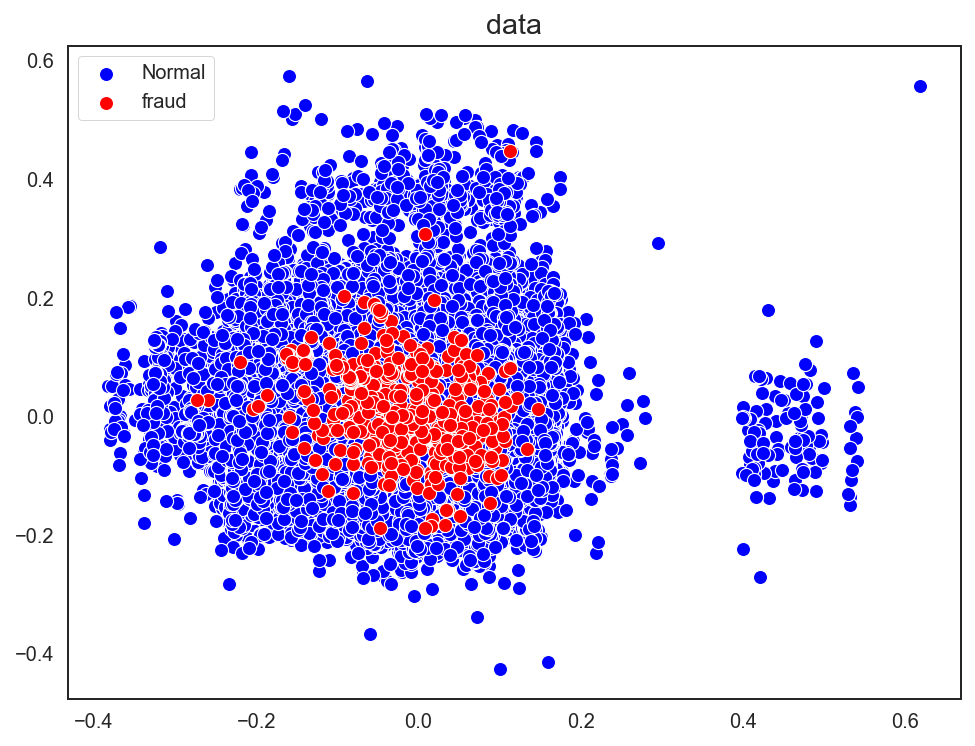

Wall time: 12.9 s


In [9]:
%%time
y1=df['Class']
x1=df.drop('Class',axis=1)

scaler = preprocessing.MinMaxScaler()
X= scaler.fit_transform(x1)

pca = PCA(n_components=2)
Xk = pca.fit_transform(X)
Y=y1
# Visualising the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(Xk[Y == 0, 0], Xk[Y == 0, 1], color = 'blue', label = 'Normal',s=50)
sns.scatterplot(Xk[Y == 1, 0], Xk[Y == 1, 1], color = 'red', label = 'fraud',s=50)
plt.grid(False)
plt.title('data')
plt.legend()
plt.show()

## **Feature Engineering**

**plot a correlation table of features**

In [10]:
#Add a lable to the first column of the table
Target=pd.DataFrame(df['Class'])
df.drop(['Class'],axis=1,inplace=True)
df = pd.concat([Target, df], axis=1)

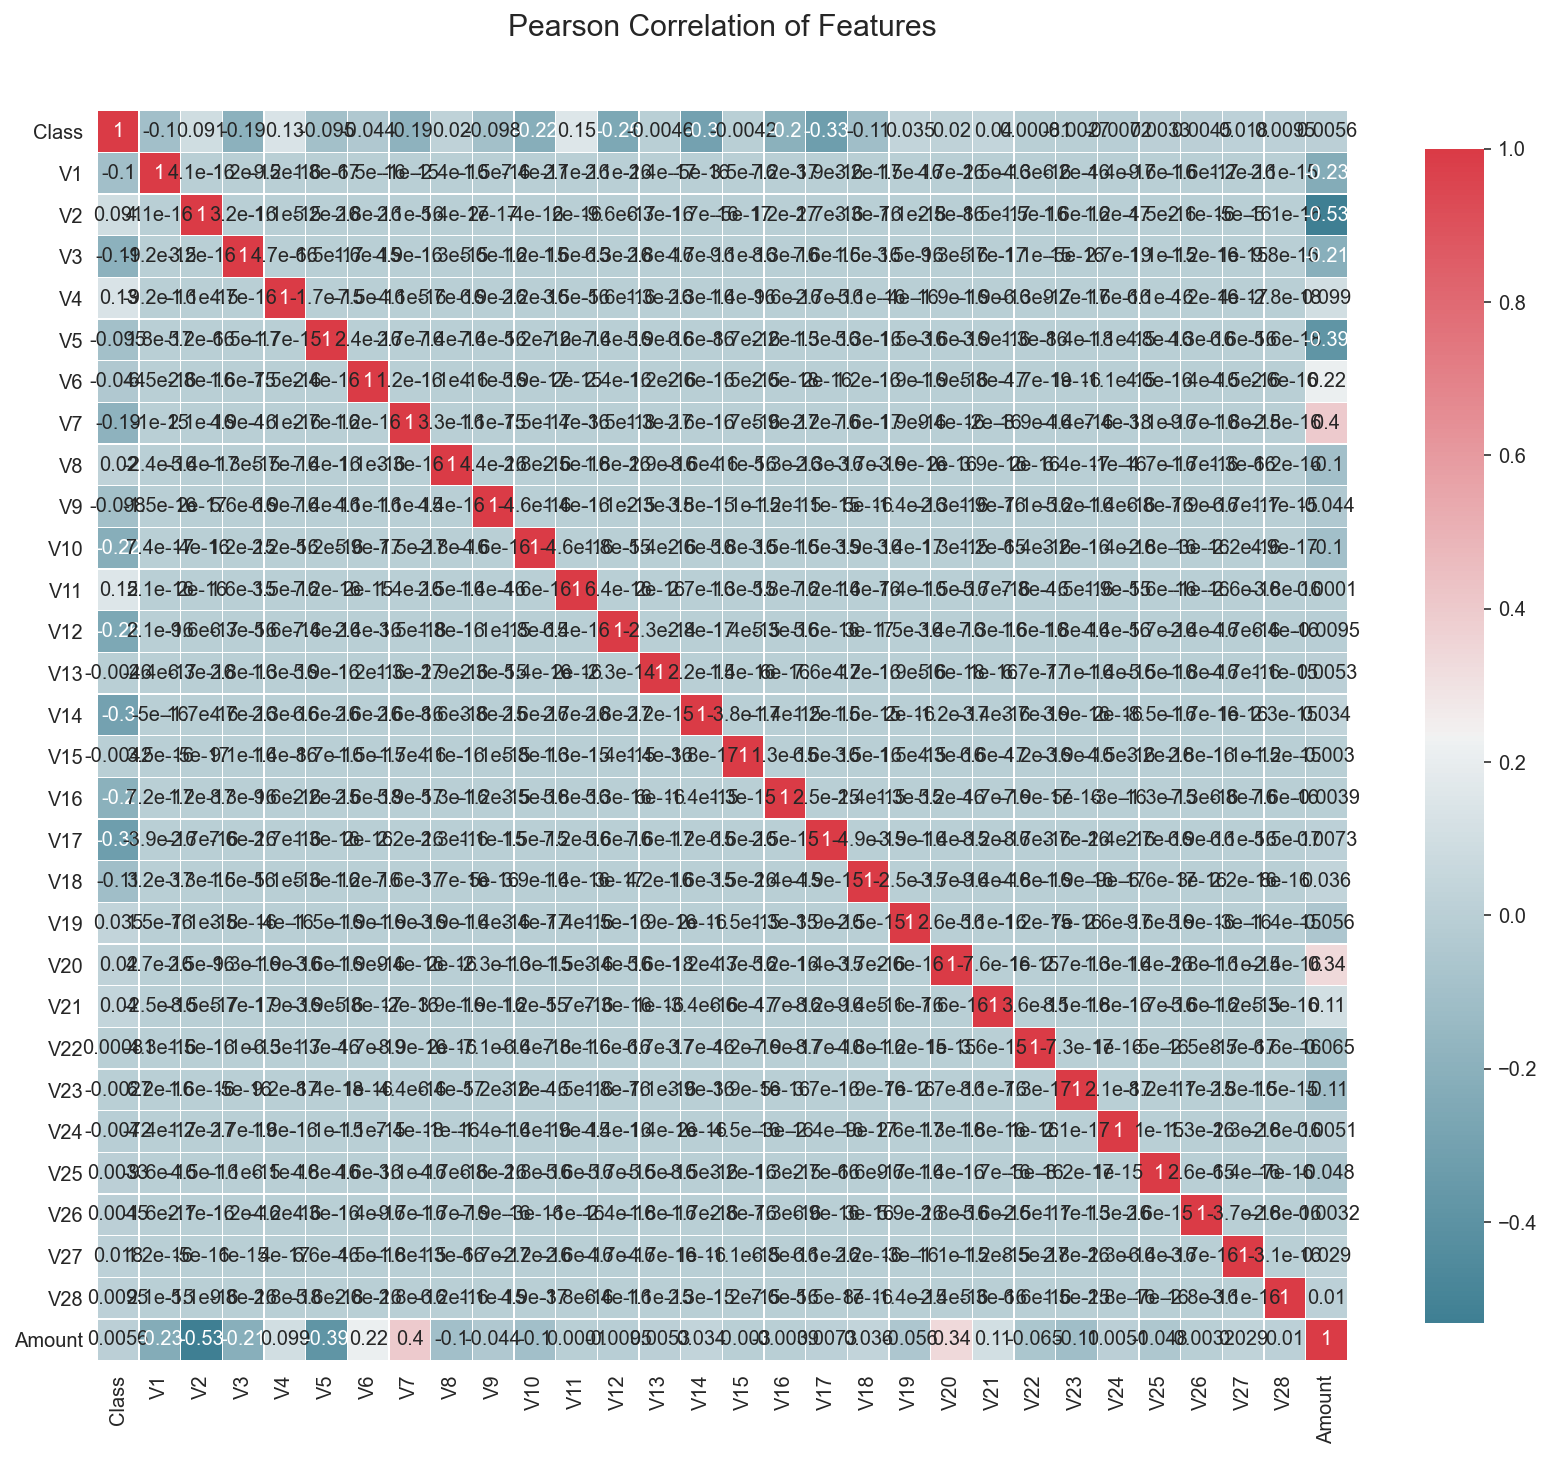

In [11]:
def correlation_heatmap(df, type):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(method=type), #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':10 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df, 'pearson')

**feature selection**

In [84]:
#The results may be different for each run
clf = SplitXY(['Class']);
X, y = clf.fit_transform(df);
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0);
clf = VotingSelector();
clf.fit(X_train, y_train);
clf.feature_importances_

,Variable_Name,Information_Value,Random_Forest,Recursive_Feature_Elimination,Extra_Trees,Chi_Square,L_One
0,V4,2.438455,0.025986,0.565090,0.039168,56.178263,0.019684
1,V14,2.263420,0.128666,-0.665832,0.120043,28.584470,-0.053603
2,V12,2.044015,0.149818,0.000000,0.122685,28.108355,-0.030940
3,V3,1.786005,0.017823,0.000000,0.039613,12.132805,0.000000
4,V11,1.774223,0.047510,0.000000,0.060281,59.350404,0.016049
5,V10,1.623403,0.075899,-0.580740,0.065251,9.228625,-0.033491
6,V16,1.226892,0.069397,-0.204636,0.074388,19.296888,-0.028160
7,V2,1.222110,0.016146,0.000000,0.017032,0.886841,-0.009112
8,V17,1.077666,0.170600,0.000000,0.118553,17.977876,-0.045138
9,V9,1.036067,0.038645,-0.148327,0.039625,5.916116,-0.021741


In [85]:
clf.feature_votes_

,Variable_Name,Information_Value,Random_Forest,Recursive_Feature_Elimination,Extra_Trees,Chi_Square,L_One,Votes
0,V4,1,1,1,1,1,1,6
1,V14,1,1,1,1,1,1,6
5,V10,1,1,1,1,1,1,6
6,V16,1,1,1,1,1,1,6
9,V9,1,1,1,1,1,1,6
2,V12,1,1,0,1,1,1,5
4,V11,1,1,0,1,1,1,5
8,V17,1,1,0,1,1,1,5
10,V7,1,1,0,1,1,1,5
11,V21,1,1,1,1,0,1,5


In [86]:
vars_selected_unbalanced = clf.feature_votes_[clf.feature_votes_['Votes'] >= 2]['Variable_Name']
print(vars_selected_unbalanced)

0      V4
1     V14
5     V10
6     V16
9      V9
2     V12
4     V11
8     V17
10     V7
11    V21
3      V3
7      V2
15    V18
12     V1
18     V8
20    V19
26    V26
Name: Variable_Name, dtype: object


In [87]:
df.drop(['Class'],axis=1,inplace=True)

In [88]:
selected_vars = list((set(vars_selected_unbalanced)))

In [89]:
df1=df[selected_vars]

In [94]:
df1.head()

,V2,V18,V5,V1,V21,V14,V3,V9,V4,V7,V6,V26,V10,V16,V12,V17,V8,V11
0,-0.072781,0.025791,-0.338321,-1.359807,-0.018307,-0.311169,2.536347,0.363787,1.378155,0.239599,0.462388,-0.189115,0.090794,-0.470401,-0.617801,0.207971,0.098698,-0.551600
1,0.266151,-0.183361,0.060018,1.191857,-0.225775,-0.143772,0.166480,-0.255425,0.448154,-0.078803,-0.082361,0.125895,-0.166974,0.463917,1.065235,-0.114805,0.085102,1.612727
2,-1.340163,-0.121359,-0.503198,-1.358354,0.247998,-0.165946,1.773209,-1.514654,0.379780,0.791461,1.800499,-0.139097,0.207643,-2.890083,0.066084,1.109969,0.247676,0.624501
3,-0.185226,1.965775,-0.010309,-0.966272,-0.108300,-0.287924,1.792993,-1.387024,-0.863291,0.237609,1.247203,-0.221929,-0.054952,-1.059647,0.178228,-0.684093,0.377436,-0.226487
4,0.877737,-0.038195,-0.407193,-1.158233,-0.009431,-1.119670,1.548718,0.817739,0.403034,0.592941,0.095921,0.502292,0.753074,-0.451449,0.538196,-0.237033,-0.270533,-0.822843


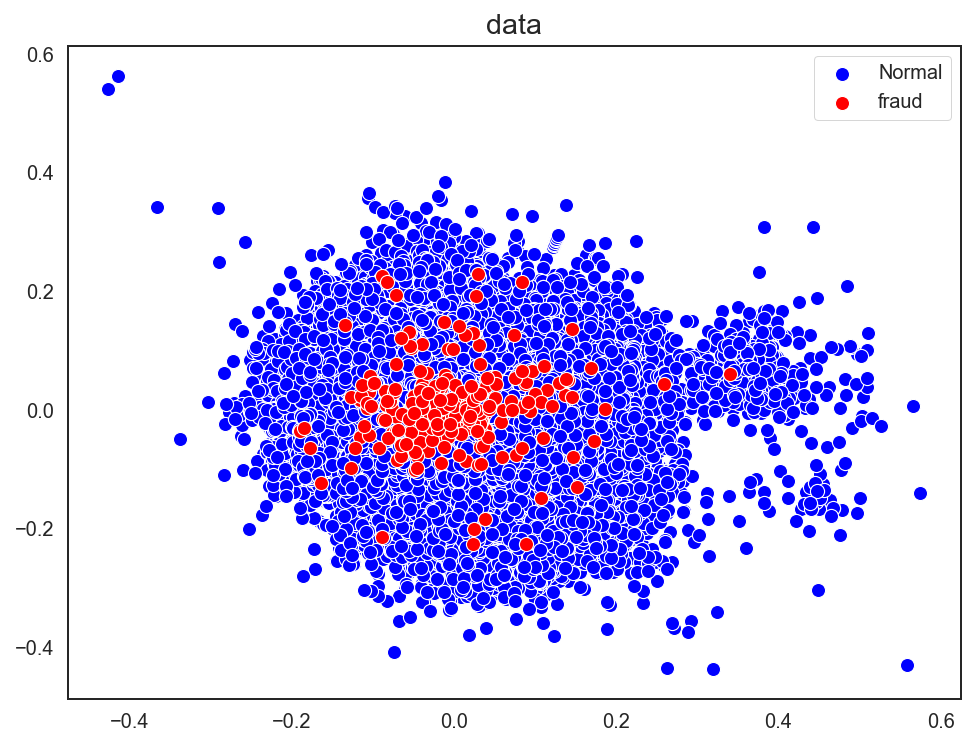

In [91]:
x1=df1
scaler = preprocessing.MinMaxScaler()
X= scaler.fit_transform(x1)
pca = PCA(n_components=2)
Xk = pca.fit_transform(X)
Y=y1
# Visualising the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(Xk[Y == 0, 0], Xk[Y == 0, 1], color = 'blue', label = 'Normal',s=50)
sns.scatterplot(Xk[Y == 1, 0], Xk[Y == 1, 1], color = 'red', label = 'fraud',s=50)
plt.grid(False)
plt.title('data')
plt.legend()
plt.show()

Final Dataframe

In [92]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V8      284807 non-null  float64
 1   V3      284807 non-null  float64
 2   V26     284807 non-null  float64
 3   V19     284807 non-null  float64
 4   V21     284807 non-null  float64
 5   V12     284807 non-null  float64
 6   V11     284807 non-null  float64
 7   V16     284807 non-null  float64
 8   V4      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V14     284807 non-null  float64
 11  V2      284807 non-null  float64
 12  V1      284807 non-null  float64
 13  V17     284807 non-null  float64
 14  V10     284807 non-null  float64
 15  V18     284807 non-null  float64
 16  V7      284807 non-null  float64
dtypes: float64(17)
memory usage: 36.9 MB


In [21]:
sampling_res=pd.DataFrame(columns=['name','Train shape','normal percent','fraud percent','accuracy','precision','recall','f1-score','tn', 'fp', 'fn', 'tp'])
sampling_c=0

In [22]:
#original dataset
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(df, Target, test_size = 0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(199364, 29) (199364, 1)
(85443, 29) (85443, 1)


In [23]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
preds = RF.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85306
           1       0.96      0.79      0.87       137

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [24]:
classes=Target.value_counts()
normal_share=round(classes[0]/Target.count()*100,2)
fraud_share=round(classes[1]/Target.count()*100, 2)
R=classification_report(y_test, preds,output_dict=True)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
sampling_res.loc[sampling_c]=['original',df.shape,normal_share.Class,fraud_share.Class,R['accuracy'],R['macro avg']['precision'],R['macro avg']['recall'],R['macro avg']['f1-score'],tn, fp, fn, tp]
sampling_c+=1

In [25]:
X_train = X_train[selected_vars] #select the variables from variable selection proces
X_test = X_test[selected_vars]

In [26]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(199364, 18) (199364, 1)
(85443, 18) (85443, 1)


In [27]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
preds = RF.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85306
           1       0.96      0.78      0.86       137

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [28]:
classes=Target.value_counts()
normal_share=round(classes[0]/Target.count()*100,2)
fraud_share=round(classes[1]/Target.count()*100, 2)
R=classification_report(y_test, preds,output_dict=True)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
sampling_res.loc[sampling_c]=['feature selected',df1.shape,normal_share.Class,fraud_share.Class,R['accuracy'],R['macro avg']['precision'],R['macro avg']['recall'],R['macro avg']['f1-score'],tn, fp, fn, tp]
sampling_c+=1

# outlier

## LocalOutlierFactor

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

In [96]:
df1_fraud=df1[Target['Class']==1]
df1_normal=df1[Target['Class']==0]
df1_fraud.shape,df1_normal.shape

((492, 18), (284315, 18))

In [97]:
clf = LocalOutlierFactor()
res = clf.fit_predict(df1_fraud)
np.unique(res)

array([-1,  1])

In [98]:
df1_normal['Class']=0
df1_fraud['Class']=res

In [99]:
frames = [df1_normal, df1_fraud]
result = pd.concat(frames)

In [100]:
lof_res=result[result['Class']!=-1]
lof_out=result[result['Class']==-1]
result[result['Class']==-1].shape

(48, 19)

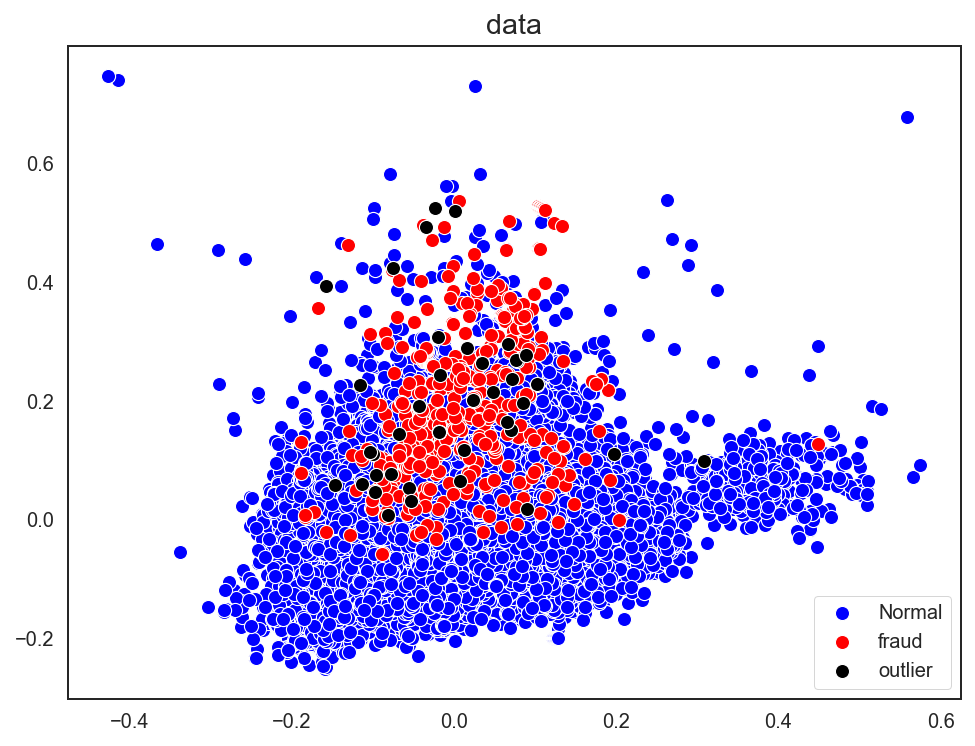

In [101]:
y1=result['Class']
x1=result.drop('Class',axis=1)
scaler = preprocessing.MinMaxScaler()
X= scaler.fit_transform(x1,y1)
pca = PCA(n_components=2)
Xk = pca.fit_transform(X)
Y=y1
# Visualising the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(Xk[Y == 0, 0], Xk[Y == 0, 1], color = 'blue', label = 'Normal',s=50)
sns.scatterplot(Xk[Y == 1, 0], Xk[Y == 1, 1], color = 'red', label = 'fraud',s=50)
sns.scatterplot(Xk[Y == -1, 0], Xk[Y == -1, 1], color = 'black', label = 'outlier',s=50)
plt.grid(False)
plt.title('data')
plt.legend()
plt.show()

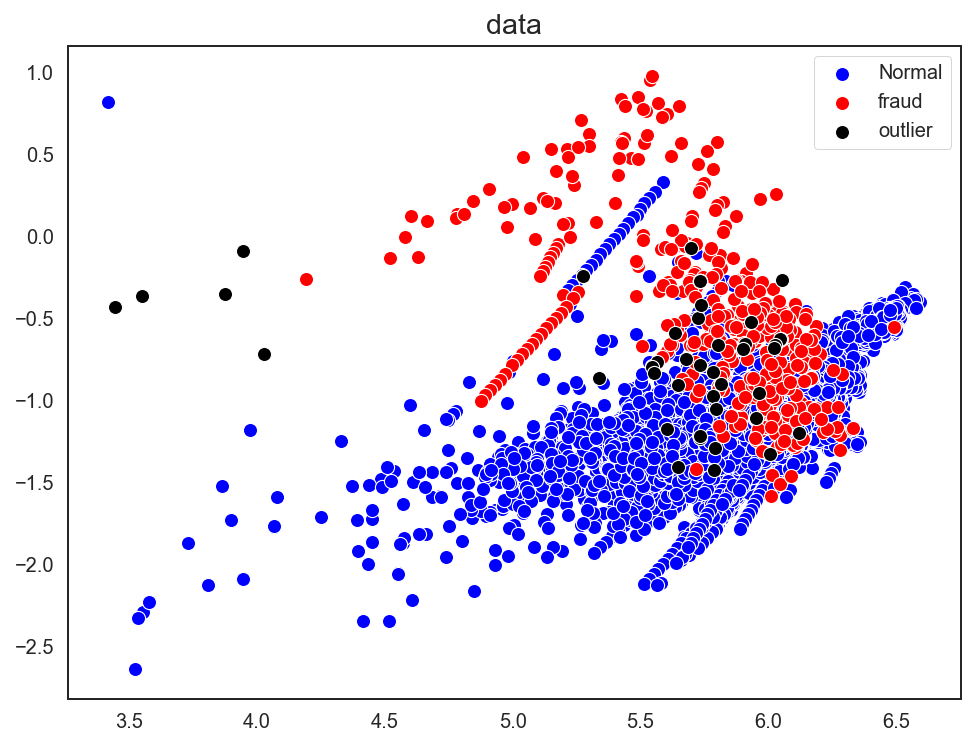

In [105]:
#random projection
y1=result['Class']
x1=result.drop('Class',axis=1)
scaler = preprocessing.MinMaxScaler()
X= scaler.fit_transform(x1,y1)
transformer = GaussianRandomProjection(n_components=2,random_state=0)
Xk = transformer.fit_transform(X)
Y=y1
# Visualising the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(Xk[Y == 0, 0], Xk[Y == 0, 1], color = 'blue', label = 'Normal',s=50)
sns.scatterplot(Xk[Y == 1, 0], Xk[Y == 1, 1], color = 'red', label = 'fraud',s=50)
sns.scatterplot(Xk[Y == -1, 0], Xk[Y == -1, 1], color = 'black', label = 'outlier',s=50)
plt.grid(False)
plt.title('data')
plt.legend()
plt.show()

## IsolationForest

In [106]:
from sklearn.ensemble import IsolationForest

In [107]:
df1_fraud=df1[Target['Class']==1]
df1_normal=df1[Target['Class']==0]
df1_fraud.shape,df1_normal.shape

((492, 18), (284315, 18))

In [108]:
clf = IsolationForest(random_state=0)
res = clf.fit_predict(df1_fraud)
np.unique(res)

array([-1,  1])

In [109]:
df1_normal['Class']=0
df1_fraud['Class']=res

In [110]:
frames = [df1_normal, df1_fraud]
result = pd.concat(frames)

In [111]:
isf_res=result[result['Class']!=-1]
isf_out=result[result['Class']==-1]
result[result['Class']==-1].shape

(54, 19)

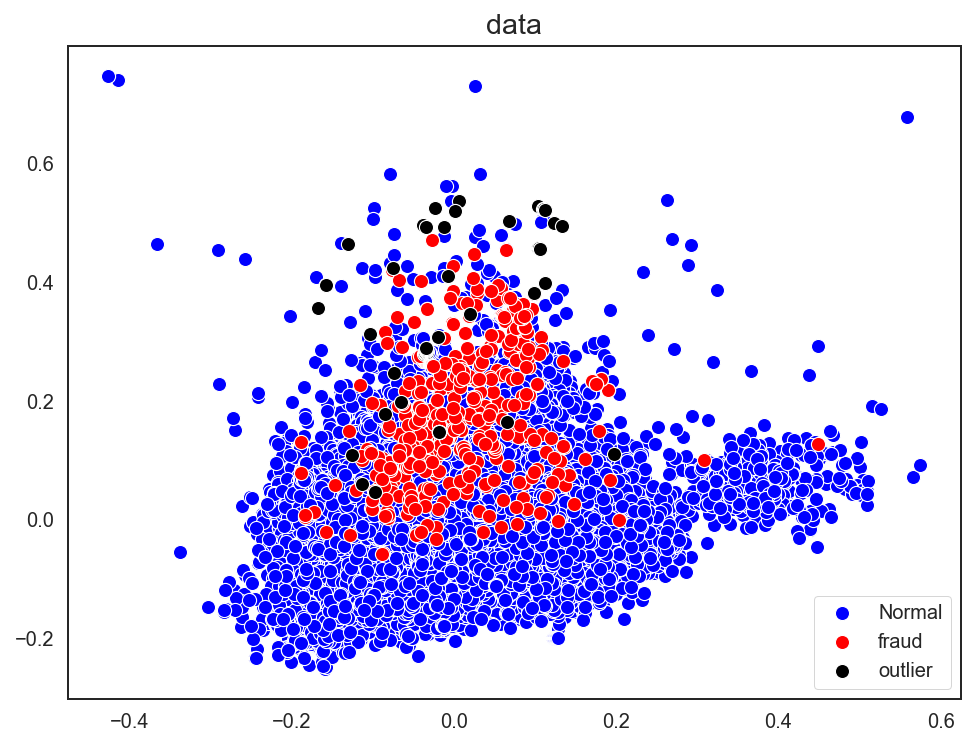

In [113]:
y1=result['Class']
x1=result.drop('Class',axis=1)
scaler = preprocessing.MinMaxScaler()
X= scaler.fit_transform(x1,y1)
pca = PCA(n_components=2)
Xk = pca.fit_transform(X)
Y=y1
# Visualising the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(Xk[Y == 0, 0], Xk[Y == 0, 1], color = 'blue', label = 'Normal',s=50)
sns.scatterplot(Xk[Y == 1, 0], Xk[Y == 1, 1], color = 'red', label = 'fraud',s=50)
sns.scatterplot(Xk[Y == -1, 0], Xk[Y == -1, 1], color = 'black', label = 'outlier',s=50)
plt.grid(False)
plt.title('data')
plt.legend()
plt.show()

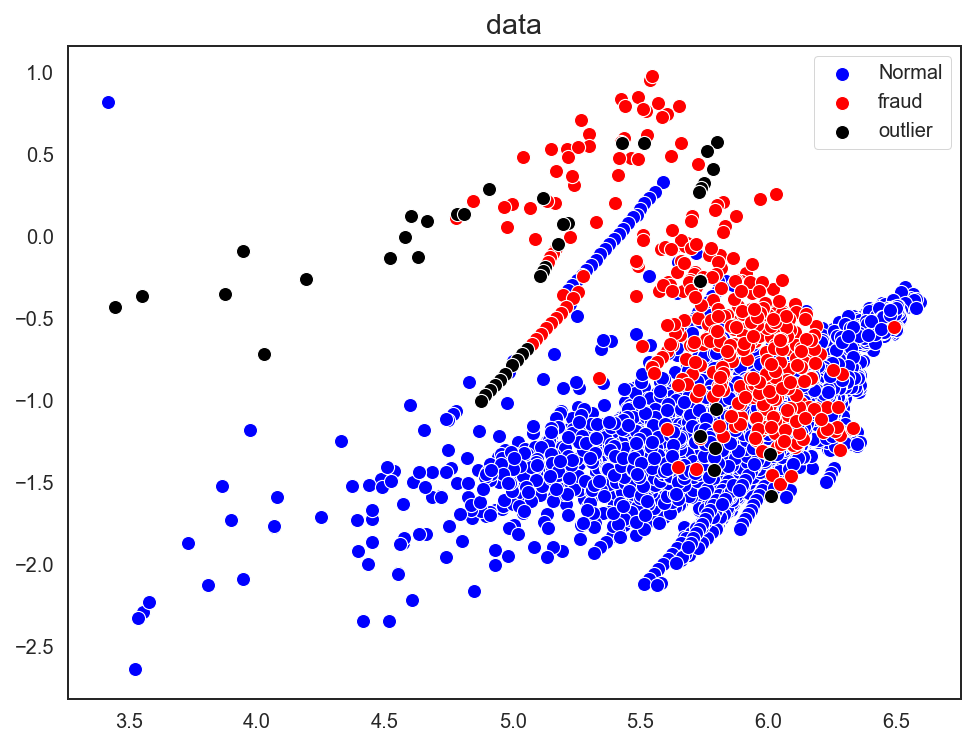

In [114]:
#random projection
y1=result['Class']
x1=result.drop('Class',axis=1)
scaler = preprocessing.MinMaxScaler()
X= scaler.fit_transform(x1,y1)
transformer = GaussianRandomProjection(n_components=2,random_state=0)
Xk = transformer.fit_transform(X)
Y=y1
# Visualising the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(Xk[Y == 0, 0], Xk[Y == 0, 1], color = 'blue', label = 'Normal',s=50)
sns.scatterplot(Xk[Y == 1, 0], Xk[Y == 1, 1], color = 'red', label = 'fraud',s=50)
sns.scatterplot(Xk[Y == -1, 0], Xk[Y == -1, 1], color = 'black', label = 'outlier',s=50)
plt.grid(False)
plt.title('data')
plt.legend()
plt.show()

## EllipticEnvelope

In [115]:
from sklearn.covariance import EllipticEnvelope

In [116]:
df1_fraud=df1[Target['Class']==1]
df1_normal=df1[Target['Class']==0]
df1_fraud.shape,df1_normal.shape

((492, 18), (284315, 18))

In [117]:
clf = EllipticEnvelope(random_state=0)
res = clf.fit_predict(df1_fraud)
np.unique(res)

array([-1,  1])

In [118]:
df1_normal['Class']=0
df1_fraud['Class']=res

In [119]:
frames = [df1_normal, df1_fraud]
result = pd.concat(frames)

In [120]:
ee_res=result[result['Class']!=-1]
ee_out=result[result['Class']==-1]
result[result['Class']==-1].shape

(50, 19)

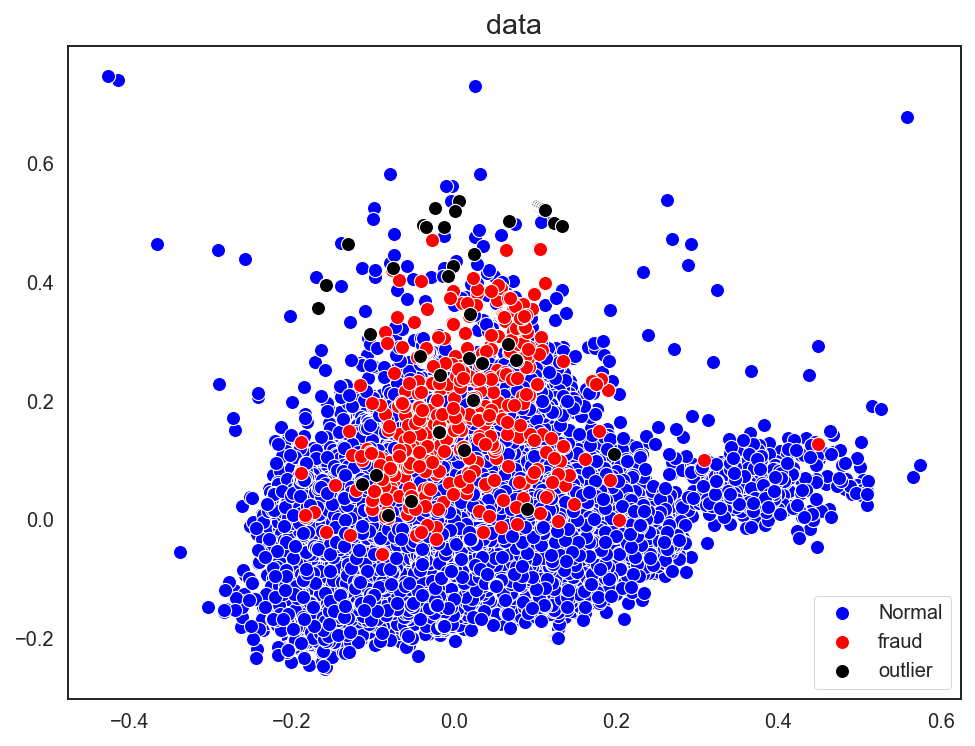

In [121]:
y1=result['Class']
x1=result.drop('Class',axis=1)
scaler = preprocessing.MinMaxScaler()
X= scaler.fit_transform(x1,y1)
pca = PCA(n_components=2)
Xk = pca.fit_transform(X)
Y=y1
# Visualising the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(Xk[Y == 0, 0], Xk[Y == 0, 1], color = 'blue', label = 'Normal',s=50)
sns.scatterplot(Xk[Y == 1, 0], Xk[Y == 1, 1], color = 'red', label = 'fraud',s=50)
sns.scatterplot(Xk[Y == -1, 0], Xk[Y == -1, 1], color = 'black', label = 'outlier',s=50)
plt.grid(False)
plt.title('data')
plt.legend()
plt.show()

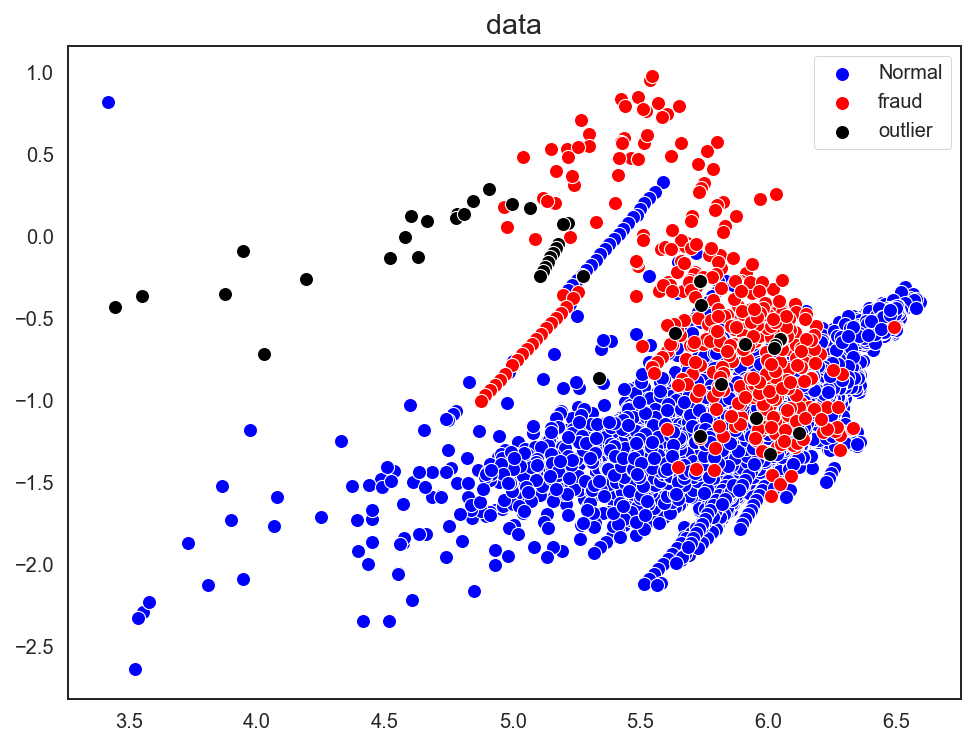

In [122]:
#random projection
y1=result['Class']
x1=result.drop('Class',axis=1)
scaler = preprocessing.MinMaxScaler()
X= scaler.fit_transform(x1,y1)
transformer = GaussianRandomProjection(n_components=2,random_state=0)
Xk = transformer.fit_transform(X)
Y=y1
# Visualising the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(Xk[Y == 0, 0], Xk[Y == 0, 1], color = 'blue', label = 'Normal',s=50)
sns.scatterplot(Xk[Y == 1, 0], Xk[Y == 1, 1], color = 'red', label = 'fraud',s=50)
sns.scatterplot(Xk[Y == -1, 0], Xk[Y == -1, 1], color = 'black', label = 'outlier',s=50)
plt.grid(False)
plt.title('data')
plt.legend()
plt.show()

## OneClassSVM

In [123]:
from sklearn.svm import OneClassSVM

In [124]:
df1_fraud=df1[Target['Class']==1]
df1_normal=df1[Target['Class']==0]
df1_fraud.shape,df1_normal.shape

((492, 18), (284315, 18))

In [125]:
clf = OneClassSVM()
res = clf.fit_predict(df1_fraud)
np.unique(res)

array([-1,  1], dtype=int64)

In [126]:
df1_normal['Class']=0
df1_fraud['Class']=res

In [127]:
frames = [df1_normal, df1_fraud]
result = pd.concat(frames)

In [128]:
osvm_res=result[result['Class']!=-1]
osvm_out=result[result['Class']==-1]
result[result['Class']==-1].shape

(245, 19)

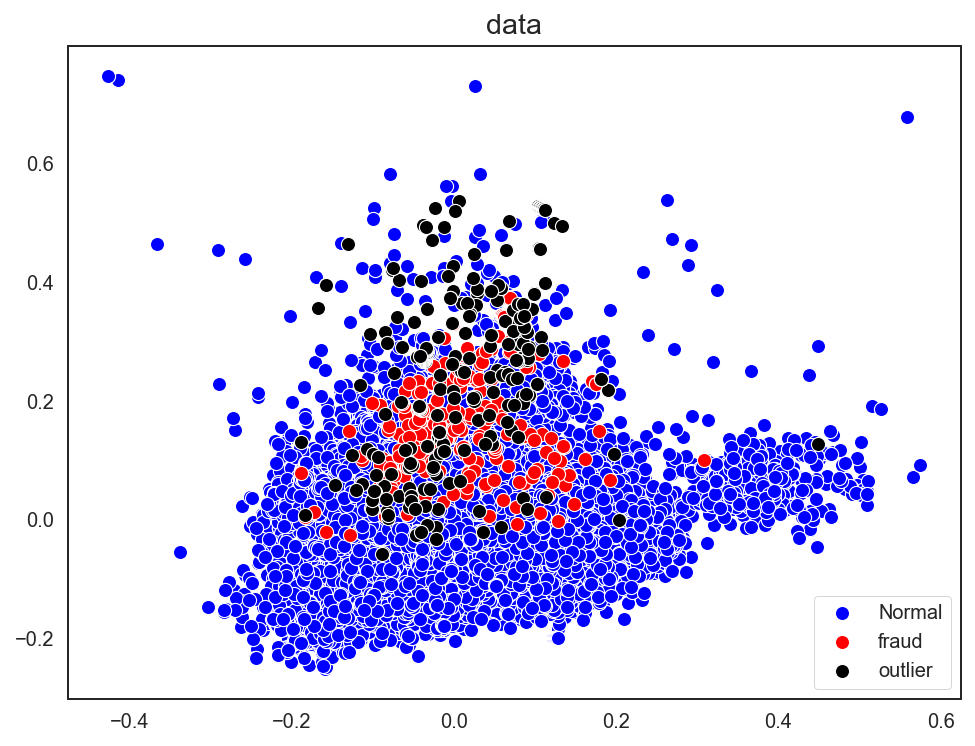

In [129]:
y1=result['Class']
x1=result.drop('Class',axis=1)
scaler = preprocessing.MinMaxScaler()
X= scaler.fit_transform(x1,y1)
pca = PCA(n_components=2)
Xk = pca.fit_transform(X)
Y=y1
# Visualising the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(Xk[Y == 0, 0], Xk[Y == 0, 1], color = 'blue', label = 'Normal',s=50)
sns.scatterplot(Xk[Y == 1, 0], Xk[Y == 1, 1], color = 'red', label = 'fraud',s=50)
sns.scatterplot(Xk[Y == -1, 0], Xk[Y == -1, 1], color = 'black', label = 'outlier',s=50)
plt.grid(False)
plt.title('data')
plt.legend()
plt.show()

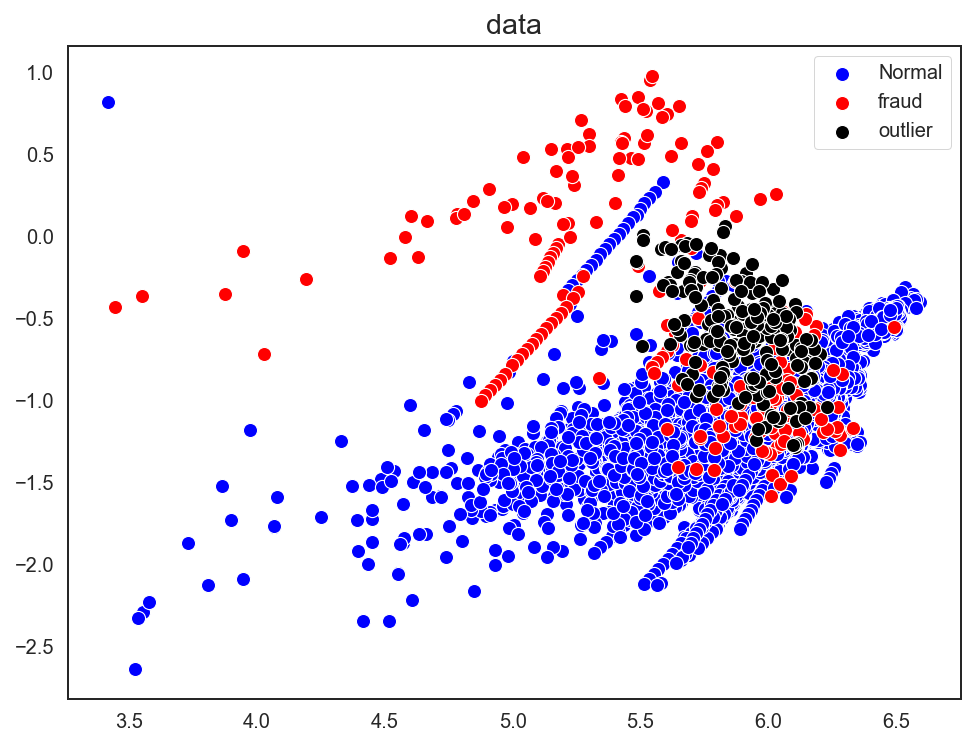

In [130]:
#random projection
y1=result['Class']
x1=result.drop('Class',axis=1)
scaler = preprocessing.MinMaxScaler()
X= scaler.fit_transform(x1,y1)
transformer = GaussianRandomProjection(n_components=2,random_state=0)
Xk = transformer.fit_transform(X)
Y=y1
# Visualising the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(Xk[Y == 0, 0], Xk[Y == 0, 1], color = 'blue', label = 'Normal',s=50)
sns.scatterplot(Xk[Y == -1, 0], Xk[Y == -1, 1], color = 'red', label = 'fraud',s=50)
sns.scatterplot(Xk[Y == 1, 0], Xk[Y == 1, 1], color = 'black', label = 'outlier',s=50)
plt.grid(False)
plt.title('data')
plt.legend()
plt.show()

In [131]:
lof_t=pd.DataFrame(lof_res['Class'])
lof_res.drop(['Class'],axis=1,inplace=True)
lof_ot=pd.DataFrame(lof_out['Class'])
lof_out.drop(['Class'],axis=1,inplace=True)

isf_t=pd.DataFrame(isf_res['Class'])
isf_res.drop(['Class'],axis=1,inplace=True)
isf_ot=pd.DataFrame(isf_out['Class'])
isf_out.drop(['Class'],axis=1,inplace=True)

ee_t=pd.DataFrame(ee_res['Class'])
ee_res.drop(['Class'],axis=1,inplace=True)
ee_ot=pd.DataFrame(ee_out['Class'])
ee_out.drop(['Class'],axis=1,inplace=True)

osvm_t=pd.DataFrame(osvm_res['Class'])
osvm_res.drop(['Class'],axis=1,inplace=True)
osvm_ot=pd.DataFrame(osvm_out['Class'])
osvm_out.drop(['Class'],axis=1,inplace=True)

In [ ]:
temp = pd.read_csv('creditcard.csv')
temp=temp[selected_vars]
temp.to_csv('fetureselectedcreditcard.csv',index=False)


lof_t.to_csv('lof_t.csv',index=False)
lof_res.to_csv('lof_res.csv',index=False)
lof_ot.to_csv('lof_ot.csv',index=False)
lof_out.to_csv('lof_out.csv',index=False)

isf_t.to_csv('isf_t.csv',index=False)
isf_res.to_csv('isf_res.csv',index=False)
isf_ot.to_csv('isf_ot.csv',index=False)
isf_out.to_csv('isf_out.csv',index=False)

ee_t.to_csv('ee_t.csv',index=False)
ee_res.to_csv('ee_res.csv',index=False)
ee_ot.to_csv('ee_ot.csv',index=False)
ee_out.to_csv('ee_out.csv',index=False)

osvm_t.to_csv('osvm_t.csv',index=False)
osvm_res.to_csv('osvm_res.csv',index=False)
osvm_ot.to_csv('osvm_ot.csv',index=False)
osvm_out.to_csv('osvm_out.csv',index=False)

# Balancing

In [87]:
import datetime
print(datetime.datetime.now())

2021-10-24 12:10:04.332371


In [135]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.under_sampling import InstanceHardnessThreshold
from imblearn.under_sampling import AllKNN 
from imblearn.under_sampling import NearMiss 
from imblearn.under_sampling import TomekLinks 
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

In [89]:
# def resmaker(name,X_resampled, y_resampled,sampling_c):
#     scaler = StandardScaler()
#     X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.3)
#     RF = RandomForestClassifier()
#     RF.fit(X_train, y_train)
#     preds = RF.predict(X_test)
#     classes=y_resampled.value_counts()
#     normal_share=round(classes[0]/y_resampled.count()*100,2)
#     fraud_share=round(classes[1]/y_resampled.count()*100, 2)
#     R=classification_report(y_test, preds,output_dict=True)
#     tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
#     sampling_res.loc[sampling_c]=[name,X_resampled.shape,normal_share.Class,fraud_share.Class,R['accuracy'],R['macro avg']['precision'],R['macro avg']['recall'],R['macro avg']['f1-score'],tn, fp, fn, tp]
#     sampling_c+=1
#     return sampling_c

In [137]:
def resmaker1(k,name,X_resampled, y_resampled,sampling_c,X_test,y_test):
#     RF = RandomForestClassifier()
#     RF.fit(X_resampled, y_resampled)
#     preds = RF.predict(X_test)
#     classes=y_resampled.value_counts()
#     normal_share=round(classes[0]/y_resampled.count()*100,2)
#     fraud_share=round(classes[1]/y_resampled.count()*100, 2)
#     R=classification_report(y_test, preds,output_dict=True)
#     tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
#     sampling_res.loc[sampling_c]=[name,X_resampled.shape,normal_share.Class,fraud_share.Class,R['accuracy'],R['macro avg']['precision'],R['macro avg']['recall'],R['macro avg']['f1-score'],tn, fp, fn, tp]
#     sampling_c+=1
#     return sampling_c
    xdfname=' X_resampled '+' + '+name+'.csv'
    ydfname=' y_resampled '+' + '+name+'.csv'
    X_resampled.to_csv(str(k)+xdfname,index=False)
    y_resampled.to_csv(str(k)+ydfname,index=False)
    X_test.to_csv(str(k)+' test '+xdfname,index=False)
    y_test.to_csv(str(k)+' test '+ydfname,index=False)
    return 1

## Over-sampling

### RandomOverSampler

In [91]:
k=1

In [92]:
X_train, X_test, y_train, y_test = train_test_split(df1, Target, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = RandomOverSampler(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    sampling_c=resmaker1(k,'RandomOverSampler',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [93]:
X_train, X_test, y_train, y_test = train_test_split(lof_res, lof_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = RandomOverSampler(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, lof_out])
    y_resampled=pd.concat([y_resampled, lof_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'RandomOverSampler + lof',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [94]:
X_train, X_test, y_train, y_test = train_test_split(isf_res, isf_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = RandomOverSampler(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, isf_out])
    y_resampled=pd.concat([y_resampled, isf_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'RandomOverSampler + isf',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [95]:
X_train, X_test, y_train, y_test = train_test_split(ee_res, ee_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = RandomOverSampler(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, ee_out])
    y_resampled=pd.concat([y_resampled, ee_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'RandomOverSampler + EllipticEnvelope',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [96]:
X_train, X_test, y_train, y_test = train_test_split(osvm_res, osvm_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = RandomOverSampler(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, osvm_out])
    y_resampled=pd.concat([y_resampled, osvm_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'RandomOverSampler + ocsvm',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

### SMOTE

In [97]:
X_train, X_test, y_train, y_test = train_test_split(df1, Target, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = SMOTE(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    sampling_c=resmaker1(k,'SMOTE',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [98]:
X_train, X_test, y_train, y_test = train_test_split(lof_res, lof_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = SMOTE(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, lof_out])
    y_resampled=pd.concat([y_resampled, lof_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'SMOTE + lof',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [99]:
X_train, X_test, y_train, y_test = train_test_split(isf_res, isf_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = SMOTE(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, isf_out])
    y_resampled=pd.concat([y_resampled, isf_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'SMOTE + isf',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [100]:
X_train, X_test, y_train, y_test = train_test_split(ee_res, ee_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = SMOTE(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, ee_out])
    y_resampled=pd.concat([y_resampled, ee_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'SMOTE + EllipticEnvelope',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [101]:
X_train, X_test, y_train, y_test = train_test_split(osvm_res, osvm_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = SMOTE(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, osvm_out])
    y_resampled=pd.concat([y_resampled, osvm_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'SMOTE + ocsvm',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

### ADASYN

In [102]:
X_train, X_test, y_train, y_test = train_test_split(df1, Target, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = ADASYN(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    sampling_c=resmaker1(k,'ADASYN',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [103]:
X_train, X_test, y_train, y_test = train_test_split(lof_res, lof_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = ADASYN(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, lof_out])
    y_resampled=pd.concat([y_resampled, lof_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'ADASYN + lof',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [104]:
X_train, X_test, y_train, y_test = train_test_split(isf_res, isf_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = ADASYN(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, isf_out])
    y_resampled=pd.concat([y_resampled, isf_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'ADASYN + isf',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [105]:
X_train, X_test, y_train, y_test = train_test_split(ee_res, ee_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = ADASYN(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, ee_out])
    y_resampled=pd.concat([y_resampled, ee_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'ADASYN + EllipticEnvelope',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [106]:
X_train, X_test, y_train, y_test = train_test_split(osvm_res, osvm_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = ADASYN(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, osvm_out])
    y_resampled=pd.concat([y_resampled, osvm_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'ADASYN + ocsvm',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

## Under-sampling 

### RandomUnderSampler

In [107]:
X_train, X_test, y_train, y_test = train_test_split(df1, Target, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = RandomUnderSampler(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    sampling_c=resmaker1(k,'RandomUnderSampler',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [108]:
X_train, X_test, y_train, y_test = train_test_split(lof_res, lof_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = RandomUnderSampler(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, lof_out])
    y_resampled=pd.concat([y_resampled, lof_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'RandomUnderSampler + lof',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [109]:
X_train, X_test, y_train, y_test = train_test_split(isf_res, isf_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = RandomUnderSampler(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, isf_out])
    y_resampled=pd.concat([y_resampled, isf_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'RandomUnderSampler + isf',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [110]:
X_train, X_test, y_train, y_test = train_test_split(ee_res, ee_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = RandomUnderSampler(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, ee_out])
    y_resampled=pd.concat([y_resampled, ee_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'RandomUnderSampler + EllipticEnvelope',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [111]:
X_train, X_test, y_train, y_test = train_test_split(osvm_res, osvm_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = RandomUnderSampler(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, osvm_out])
    y_resampled=pd.concat([y_resampled, osvm_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'RandomUnderSampler + ocsvm',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

### TomekLinks

In [112]:
X_train, X_test, y_train, y_test = train_test_split(df1, Target, test_size = 0.3,random_state=0)
ros = TomekLinks()
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
sampling_c=resmaker1(k,'TomekLinks',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

In [113]:
X_train, X_test, y_train, y_test = train_test_split(lof_res, lof_t, test_size = 0.3,random_state=0)
ros = TomekLinks()
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
X_resampled=pd.concat([X_resampled, lof_out])
y_resampled=pd.concat([y_resampled, lof_ot])
y_resampled[y_resampled==-1]=1
sampling_c=resmaker1(k,'TomekLinks + lof',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

In [114]:
X_train, X_test, y_train, y_test = train_test_split(isf_res, isf_t, test_size = 0.3,random_state=0)
ros = TomekLinks()
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
X_resampled=pd.concat([X_resampled, isf_out])
y_resampled=pd.concat([y_resampled, isf_ot])
y_resampled[y_resampled==-1]=1
sampling_c=resmaker1(k,'TomekLinks + isf',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

In [115]:
X_train, X_test, y_train, y_test = train_test_split(ee_res, ee_t, test_size = 0.3,random_state=0)
ros = TomekLinks()
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
X_resampled=pd.concat([X_resampled, ee_out])
y_resampled=pd.concat([y_resampled, ee_ot])
y_resampled[y_resampled==-1]=1
sampling_c=resmaker1(k,'TomekLinks + EllipticEnvelope',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

In [116]:
X_train, X_test, y_train, y_test = train_test_split(osvm_res, osvm_t, test_size = 0.3,random_state=0)
ros = TomekLinks()
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
X_resampled=pd.concat([X_resampled, osvm_out])
y_resampled=pd.concat([y_resampled, osvm_ot])
y_resampled[y_resampled==-1]=1
sampling_c=resmaker1(k,'TomekLinks + ocsvm',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

### InstanceHardnessThreshold

In [117]:
X_train, X_test, y_train, y_test = train_test_split(df1, Target, test_size = 0.3,random_state=0)
ros = InstanceHardnessThreshold(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
sampling_c=resmaker1(k,'InstanceHardnessThreshold',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

In [118]:
X_train, X_test, y_train, y_test = train_test_split(lof_res, lof_t, test_size = 0.3,random_state=0)
ros = InstanceHardnessThreshold(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
X_resampled=pd.concat([X_resampled, lof_out])
y_resampled=pd.concat([y_resampled, lof_ot])
y_resampled[y_resampled==-1]=1
sampling_c=resmaker1(k,'InstanceHardnessThreshold + lof',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

In [119]:
X_train, X_test, y_train, y_test = train_test_split(isf_res, isf_t, test_size = 0.3,random_state=0)
ros = InstanceHardnessThreshold(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
X_resampled=pd.concat([X_resampled, isf_out])
y_resampled=pd.concat([y_resampled, isf_ot])
y_resampled[y_resampled==-1]=1
sampling_c=resmaker1(k,'InstanceHardnessThreshold + isf',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

In [120]:
X_train, X_test, y_train, y_test = train_test_split(ee_res, ee_t, test_size = 0.3,random_state=0)
ros = InstanceHardnessThreshold(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
X_resampled=pd.concat([X_resampled, ee_out])
y_resampled=pd.concat([y_resampled, ee_ot])
y_resampled[y_resampled==-1]=1
sampling_c=resmaker1(k,'InstanceHardnessThreshold + EllipticEnvelope',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

In [121]:
X_train, X_test, y_train, y_test = train_test_split(osvm_res, osvm_t, test_size = 0.3,random_state=0)
ros = InstanceHardnessThreshold(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
X_resampled=pd.concat([X_resampled, osvm_out])
y_resampled=pd.concat([y_resampled, osvm_ot])
y_resampled[y_resampled==-1]=1
sampling_c=resmaker1(k,'InstanceHardnessThreshold + ocsvm',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

### NearMiss

In [122]:
X_train, X_test, y_train, y_test = train_test_split(df1, Target, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = NearMiss(sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    sampling_c=resmaker1(k,'NearMiss',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [123]:
X_train, X_test, y_train, y_test = train_test_split(lof_res, lof_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = NearMiss(sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, lof_out])
    y_resampled=pd.concat([y_resampled, lof_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'NearMiss + lof',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [124]:
X_train, X_test, y_train, y_test = train_test_split(isf_res, isf_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = NearMiss(sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, isf_out])
    y_resampled=pd.concat([y_resampled, isf_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'NearMiss + isf',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [125]:
X_train, X_test, y_train, y_test = train_test_split(ee_res, ee_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = NearMiss(sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, ee_out])
    y_resampled=pd.concat([y_resampled, ee_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'NearMiss + EllipticEnvelope',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [126]:
X_train, X_test, y_train, y_test = train_test_split(osvm_res, osvm_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = NearMiss(sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, osvm_out])
    y_resampled=pd.concat([y_resampled, osvm_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'NearMiss + ocsvm',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

### AllKNN

In [127]:
X_train, X_test, y_train, y_test = train_test_split(df1, Target, test_size = 0.3,random_state=0)
ros = AllKNN()
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
sampling_c=resmaker1(k,'AllKNN',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

In [128]:
X_train, X_test, y_train, y_test = train_test_split(lof_res, lof_t, test_size = 0.3,random_state=0)
ros = AllKNN()
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
X_resampled=pd.concat([X_resampled, lof_out])
y_resampled=pd.concat([y_resampled, lof_ot])
y_resampled[y_resampled==-1]=1
sampling_c=resmaker1(k,'AllKNN + lof',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

In [129]:
X_train, X_test, y_train, y_test = train_test_split(isf_res, isf_t, test_size = 0.3,random_state=0)
ros = AllKNN()
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
X_resampled=pd.concat([X_resampled, isf_out])
y_resampled=pd.concat([y_resampled, isf_ot])
y_resampled[y_resampled==-1]=1
sampling_c=resmaker1(k,'AllKNN + isf',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

In [130]:
X_train, X_test, y_train, y_test = train_test_split(ee_res, ee_t, test_size = 0.3,random_state=0)
ros = AllKNN()
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
X_resampled=pd.concat([X_resampled, ee_out])
y_resampled=pd.concat([y_resampled, ee_ot])
y_resampled[y_resampled==-1]=1
sampling_c=resmaker1(k,'AllKNN + EllipticEnvelope',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

In [131]:
X_train, X_test, y_train, y_test = train_test_split(osvm_res, osvm_t, test_size = 0.3,random_state=0)
ros = AllKNN()
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
X_resampled=pd.concat([X_resampled, osvm_out])
y_resampled=pd.concat([y_resampled, osvm_ot])
y_resampled[y_resampled==-1]=1
sampling_c=resmaker1(k,'AllKNN + ocsvm',X_resampled, y_resampled,sampling_c,X_test,y_test )
k=k+1

## Combination of over- and under-sampling

### SMOTEENN

In [139]:
X_train, X_test, y_train, y_test = train_test_split(df1, Target, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = SMOTEENN(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    sampling_c=resmaker1(k,'SMOTEENN',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [140]:
X_train, X_test, y_train, y_test = train_test_split(lof_res, lof_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = SMOTEENN(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, lof_out])
    y_resampled=pd.concat([y_resampled, lof_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'SMOTEENN + lof',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [141]:
X_train, X_test, y_train, y_test = train_test_split(isf_res, isf_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = SMOTEENN(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, isf_out])
    y_resampled=pd.concat([y_resampled, isf_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'SMOTEENN + isf',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [142]:
X_train, X_test, y_train, y_test = train_test_split(ee_res, ee_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = SMOTEENN(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, ee_out])
    y_resampled=pd.concat([y_resampled, ee_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'SMOTEENN + EllipticEnvelope',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [143]:
X_train, X_test, y_train, y_test = train_test_split(osvm_res, osvm_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = SMOTEENN(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, osvm_out])
    y_resampled=pd.concat([y_resampled, osvm_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'SMOTEENN + ocsvm',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

### SMOTETomek

In [144]:
X_train, X_test, y_train, y_test = train_test_split(df1, Target, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = SMOTETomek(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    sampling_c=resmaker1(k,'SMOTETomek',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [145]:
X_train, X_test, y_train, y_test = train_test_split(lof_res, lof_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = SMOTETomek(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, lof_out])
    y_resampled=pd.concat([y_resampled, lof_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'SMOTETomek + lof',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [146]:
X_train, X_test, y_train, y_test = train_test_split(isf_res, isf_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = SMOTETomek(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, isf_out])
    y_resampled=pd.concat([y_resampled, isf_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'SMOTETomek + isf',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [147]:
X_train, X_test, y_train, y_test = train_test_split(ee_res, ee_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = SMOTETomek(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, ee_out])
    y_resampled=pd.concat([y_resampled, ee_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'SMOTETomek + EllipticEnvelope',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1

In [148]:
X_train, X_test, y_train, y_test = train_test_split(osvm_res, osvm_t, test_size = 0.3,random_state=0)
for i in [0.0526315789, 0.111111,0.125,0.2,0.25,0.333333,0.5,1]:
    ros = SMOTETomek(random_state=0,sampling_strategy=i)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    X_resampled=pd.concat([X_resampled, osvm_out])
    y_resampled=pd.concat([y_resampled, osvm_ot])
    y_resampled[y_resampled==-1]=1
    sampling_c=resmaker1(k,'SMOTETomek + ocsvm',X_resampled, y_resampled,sampling_c,X_test,y_test )
    k=k+1